## Importing Labelled Data 

In [1]:
import pandas as pd
import numpy as np
import re

In [64]:
new_df=pd.read_csv("C:\\Users\\user\\Twitter analysis Project\\data\\labelled_Tweets.csv")

# Preprocessing Data
1. Replace Emoticons with text
2. Replace emojis with text
3. Replace all acronyms with their translation
4. Replace contraction with words
5. Removing punctuations,numbers,special characters , whitespaces
 


### Replace Emoticons with text


In [65]:
# function for converting emoticons to text
emoticons = {
':-)': 'happy / smile', 
':)': 'happy / smile', 
';)': 'wink / glad', 
':o)': 'happy / smile', 
':]': 'happy / smile', 
':3': 'happy / smile', 
':c)': 'happy / smile',
':>': 'happy / smile', 
'=]': 'happy / smile', 
'8)': 'happy / smile', 
'=)': 'happy / smile', 
':}': 'happy / smile',
':^)': 'happy / smile', 
':-D': 'laugh / big grin',
':D': 'laugh / big grin',
'8-D': 'laugh / big grin / laugh with glasses / wide-eyed surprise', 
'8D': 'laugh / big grin / laugh with glasses / wide-eyed surprise', 
'x-D': 'laugh', 
'xD': 'laugh', 
'X-D': 'laugh', 
'XD': 'laugh', 
'=-D': 'laugh / big grin', 
'=D': 'laugh / big grin',
'=-3': 'laugh / big grin', 
'=3': 'laugh / big grin', 
':-))': 'very happy / double chin', 
":'-)": 'tears of happiness', 
":')": 'tears of happiness', 
':*': 'kiss', 
':^*': 'kiss', 
'>:P': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
':-P': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
':P': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
'X-P': 'tongue sticking out / cheeky / playful / blowing a raspberry',
'x-p': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
'xp': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
'XP': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
':-p': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
':p': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
'=p': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
':-b': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
':b': 'tongue sticking out / cheeky / playful / blowing a raspberry', 
'>:)': 'devilish / cheeky / playful', 
'>;)': 'devilish / cheeky / playful / wink', 
'>:-)': 'devilish / cheeky / playful',
'<3': 'heart / love',
':L': 'skeptical / undecided / uneasy / hesitant', 
':-/': 'skeptical / undecided / uneasy / hesitant', 
'>:/': 'skeptical / annoyed / undecided / uneasy / hesitant', 
':S': 'skeptical / undecided / uneasy / hesitant', 
'>:[': 'frown / angry / pouting', 
':@': 'frown / sad / pouting', 
':-(': 'frown / sad / pouting', 
':[': 'frown / sad / pouting', 
':-||': 'frown / pouting', 
'=L': 'skeptical / undecided / uneasy / hesitant', 
':<': 'frown / sad / pouting',
':-[': 'frown / sad / pouting', 
':-<': 'frown / sad / pouting', 
'=\\': 'skeptical / undecided / uneasy / hesitant', 
'=/': 'skeptical / undecided / uneasy / hesitant', 
'>:(': 'skeptical / annoyed / undecided / uneasy / hesitant', 
':(': 'frown / sad / pouting', 
'>.<': 'frown / pouting', 
":'-(": 'cry', 
":'(": 'cry', 
':\\': 'skeptical / undecided / uneasy / hesitant', 
':-c': 'frown / sad / pouting',
':c': 'frown / sad / pouting', 
':{': 'frown / sad / pouting', 
'>:\\': 'skeptical / annoyed / undecided / uneasy / hesitant', 
';(': 'skeptical / annoyed / undecided / uneasy / hesitant'
}

In [66]:
def emoticon_text(text):
    words=text.split()
    reformed = [emoticons[word] if word in emoticons else word for word in words]
    text = " ".join(reformed)
    return text

In [67]:
#Apply converting emoticons to text function to text column in df_tweets dataframe
new_df['cleaned_text'] = new_df['text'].apply(lambda x: emoticon_text(x))

In [68]:
new_df[['text','cleaned_text']][15615:30000]

,text,cleaned_text
15615,This is everyday at 6:45am on the rt3. POINT I...,This is everyday at 6:45am on the rt3. POINT I...
15616,India is administering the world's largest vac...,India is administering the world's largest vac...
15617,COVID-19: Better summer possible with more vac...,COVID-19: Better summer possible with more vac...
15618,"Meditation can be a tool in the proverbial ""to...","Meditation can be a tool in the proverbial ""to..."
15619,🙏 💉💉Required💉💉 🙏 Patient Name 👉asha rawat Pati...,🙏 💉💉Required💉💉 🙏 Patient Name 👉asha rawat Pati...
...,...,...
29995,Test mein kaunsa Finisher bhai India rarely cha…,Test mein kaunsa Finisher bhai India rarely cha…
29996,Our dream of pursuing higher studies is at sta...,Our dream of pursuing higher studies is at sta...
29997,We've been in lockdown already for almost 8 mo...,We've been in lockdown already for almost 8 mo...
29998,States have put lockdown as centre never inter...,States have put lockdown as centre never inter...


In [69]:
import re
import emoji
# function for twitter text cleaning 
def emoji_cleaner(text):
# convert emojis to text
    text = emoji.demojize(text)
    text = text.replace(":"," ")
    return text

In [70]:
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: emoji_cleaner(x))

In [71]:
new_df[['text','cleaned_text']][15600:30000]

,text,cleaned_text
15600,"In Nepal, a situation is unfolding that looks ...","In Nepal, a situation is unfolding that looks ..."
15601,Appointments for COVID-19 vaccinations are ava...,Appointments for COVID-19 vaccinations are ava...
15602,*COVID-19 TESTING IN SOUTH TRINIDAD* A drive-i...,*COVID-19 TESTING IN SOUTH TRINIDAD* A drive-i...
15603,"Uber, Lyft to Provide Free Rides to Covid-19 V...","Uber, Lyft to Provide Free Rides to Covid-19 V..."
15604,In order to maintain public health and safety ...,In order to maintain public health and safety ...
...,...,...
29995,Test mein kaunsa Finisher bhai India rarely cha…,Test mein kaunsa Finisher bhai India rarely cha…
29996,Our dream of pursuing higher studies is at sta...,Our dream of pursuing higher studies is at sta...
29997,We've been in lockdown already for almost 8 mo...,We've been in lockdown already for almost 8 mo...
29998,States have put lockdown as centre never inter...,States have put lockdown as centre never inter...


### Replace all acronyms with their translation

Next, we replace all acronyms with their translation using the acronym dictionary. At this point, tweets are going to be tokenized by getting rid of the punctuation and using split in order to do the process really fast. We could use nltk.tokenizer but it is definitly much much slower (also much more accurate). Furthermore the replacements will not be perfect, a simple example is the acronym "im" meaning "instant message". It would not be surprising that in most of the cases, "im" means "I am". We will do some adjustements later to see if we can improve our results.|

In [72]:
import string
from collections import Counter

In [73]:
acronyms = pd.read_csv('C:\\Users\\user\\Twitter analysis Project\\tools\\acronyms.csv')
acronyms.tail(5)

,Acronym,Translation
5459,tomoz,tomorrow
5460,gpytfaht,gladly pay you tuesday for a hamburger today
5461,l8rz,later
5462,sase,self addressed stamped envelope
5463,bwoc,big woman on campus


In [74]:
acronym_dictionary = dict(zip(acronyms.Acronym, acronyms.Translation))
acronyms_counter = Counter()
def acronym_translation(text,acronyms_counter):
    words=text.split()
    new_words=[]
    for x,word in enumerate(words):
        if word in acronym_dictionary:
            acronyms_counter[word] += 1
            new_words.extend(acronym_dictionary[word].split())

        else:
            new_words.append(word)
    return " ".join(new_words)

In [75]:
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda tweet:acronym_translation(tweet, acronyms_counter)) 

In [76]:
# Get and display top20 acronyms
top20acronyms = acronyms_counter.most_common(20)
top20acronyms

[('2', 542),
 ('4', 257),
 ('u', 254),
 ('gonna', 111),
 ('r', 95),
 ('dont', 86),
 ('ur', 77),
 ('ppl', 75),
 ('n', 74),
 ('im', 69),
 ('bc', 59),
 ('pls', 56),
 ('wanna', 53),
 ('hai', 49),
 ('lol', 47),
 ('yr', 47),
 ('app', 46),
 ('@', 43),
 ('plz', 42),
 ('w/', 39)]

In [77]:
# Just to better visualize the top 20 acronym
for i, (acronym, value) in enumerate(top20acronyms):
    print( str(i + 1) + ") " + acronym + " => " + acronym_dictionary[acronym] + " : " + str(value))

1) 2 => too : 542
2) 4 => for : 257
3) u => you : 254
4) gonna => going to : 111
5) r => are : 95
6) dont => don't : 86
7) ur => your : 77
8) ppl => people : 75
9) n => and : 74
10) im => instant message : 69
11) bc => because : 59
12) pls => please : 56
13) wanna => want to : 53
14) hai => hello : 49
15) lol => laughing out loud : 47
16) yr => year : 47
17) app => application : 46
18) @ => at : 43
19) plz => please : 42
20) w/ => with : 39


([<matplotlib.axis.XTick at 0x280e5899e80>,
 [Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, 'u'),
  Text(0, 0, 'gonna'),
  Text(0, 0, 'r'),
  Text(0, 0, 'dont'),
  Text(0, 0, 'ur'),
  Text(0, 0, 'ppl'),
  Text(0, 0, 'n'),
  Text(0, 0, 'im'),
  Text(0, 0, 'bc'),
  Text(0, 0, 'pls'),
  Text(0, 0, 'wanna'),
  Text(0, 0, 'hai'),
  Text(0, 0, 'lol'),
  Text(0, 0, 'yr'),
  Text(0, 0, 'app'),
  Text(0, 0, '@'),
  Text(0, 0, 'plz'),
  Text(0, 0, 'w/')])

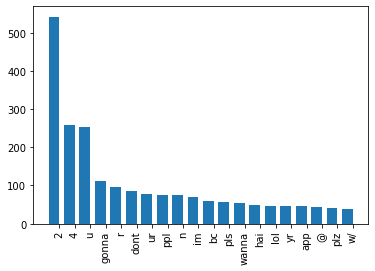

In [78]:

import matplotlib.pyplot as plt
# With a bar plot
plt.close()
top20acronym_keys = [x[0] for x in top20acronyms]
top20acronym_values = [x[1] for x in top20acronyms]
indexes = np.arange(len(top20acronym_keys))
width = 0.7
plt.bar(indexes, top20acronym_values, width)
plt.xticks(indexes + width * 0.5, top20acronym_keys, rotation="vertical")

In [79]:
# function for replacing contractions
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / i will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def replace_contractions(text):
    text = text.replace("’","'")
    text=text.lower()
    words = text.split()
    reformed = [contractions[word] if word in contractions else word for word in words]
    text = " ".join(reformed)
    return text

In [80]:
#Apply replace contractions function to cleaned_text column in df_tweets dataframe
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: replace_contractions(x))

In [81]:
new_df[['text','cleaned_text']][355:30000]

,text,cleaned_text
355,COVID-19 vaccine rollout by India has 'rescued...,covid-19 vaccine rollout by india has 'rescued...
356,No vaccine in our state#jharkhand,no vaccine in our state#jharkhand
357,“I call upon the US to put an end to export ba...,“i call upon the us to put an end to export ba...
358,Me when others ask if I have had my vaccine ei...,me when others ask if i have had my vaccine ei...
359,Fact check: No evidence that a 2-year-old died...,fact check no evidence that a 2-year-old died ...
...,...,...
29995,Test mein kaunsa Finisher bhai India rarely cha…,test mein kaunsa finisher bhai india rarely cha…
29996,Our dream of pursuing higher studies is at sta...,our dream of pursuing higher studies is at sta...
29997,We've been in lockdown already for almost 8 mo...,we have been in lockdown already for almost 8 ...
29998,States have put lockdown as centre never inter...,states have put lockdown as centre never inter...


### Removing punctuations,numbers,special characters , whitespaces
 

In [82]:
import re
# function for twitter text cleaning 
def tweet_cleaner(text):
    # remove punctuations, numbers, and special characters 
    text = re.sub("[^a-zA-Z]"," ",text) 
        # remove whitespaces 
    text = ' '.join(text.split()) 
    return text

In [83]:
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: tweet_cleaner(x))

In [84]:
new_df[['text','cleaned_text']][15600:30000]

,text,cleaned_text
15600,"In Nepal, a situation is unfolding that looks ...",in nepal a situation is unfolding that looks c...
15601,Appointments for COVID-19 vaccinations are ava...,appointments for covid vaccinations are availa...
15602,*COVID-19 TESTING IN SOUTH TRINIDAD* A drive-i...,covid testing in south trinidad a drive in cov...
15603,"Uber, Lyft to Provide Free Rides to Covid-19 V...",uber lyft to provide free rides to covid vacci...
15604,In order to maintain public health and safety ...,in order to maintain public health and safety ...
...,...,...
29995,Test mein kaunsa Finisher bhai India rarely cha…,test mein kaunsa finisher bhai india rarely cha
29996,Our dream of pursuing higher studies is at sta...,our dream of pursuing higher studies is at sta...
29997,We've been in lockdown already for almost 8 mo...,we have been in lockdown already for almost mo...
29998,States have put lockdown as centre never inter...,states have put lockdown as centre never inter...


# Advanced Pre-processing

In [59]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Lemmitization

In [61]:

# function for lemmatizing words
def lemmatize_text(text):
    wl = WordNetLemmatizer()
    token_words=word_tokenize(str(text))
    token_words
    lemmatize_text=[]
    for word in token_words:
        lemmatize_text.append(wl.lemmatize(word))
        lemmatize_text.append(" ")
    return "".join(lemmatize_text)

In [62]:
#Apply lemmatizing text function to cleaned_text column in df_tweets dataframe
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: lemmatize_text(x))

In [164]:
new_df[['text','cleaned_text']][15600:30000]

,text,cleaned_text
15600,"In Nepal, a situation is unfolding that looks ...",in nepal a situation is unfolding that look ch...
15601,Appointments for COVID-19 vaccinations are ava...,appointment for covid vaccination are availabl...
15602,*COVID-19 TESTING IN SOUTH TRINIDAD* A drive-i...,covid testing in south trinidad a drive in cov...
15603,"Uber, Lyft to Provide Free Rides to Covid-19 V...",uber lyft to provide free ride to covid vaccin...
15604,In order to maintain public health and safety ...,in order to maintain public health and safety ...
...,...,...
29995,Test mein kaunsa Finisher bhai India rarely cha…,test mein kaunsa finisher bhai india rarely cha
29996,Our dream of pursuing higher studies is at sta...,our dream of pursuing higher study is at stake...
29997,We've been in lockdown already for almost 8 mo...,we have been in lockdown already for almost mo...
29998,States have put lockdown as centre never inter...,state have put lockdown a centre never interfe...


In [165]:
new_df.to_csv(r'C:\\Users\\user\\Twitter analysis Project\\data\\tweets after additional steps\\nontokenized_lemm_stopwords.csv', index = False, header=True)

In [85]:
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: x.split())
new_df[['text','cleaned_text']][15600:30000]

,text,cleaned_text
15600,"In Nepal, a situation is unfolding that looks ...","[in, nepal, a, situation, is, unfolding, that,..."
15601,Appointments for COVID-19 vaccinations are ava...,"[appointments, for, covid, vaccinations, are, ..."
15602,*COVID-19 TESTING IN SOUTH TRINIDAD* A drive-i...,"[covid, testing, in, south, trinidad, a, drive..."
15603,"Uber, Lyft to Provide Free Rides to Covid-19 V...","[uber, lyft, to, provide, free, rides, to, cov..."
15604,In order to maintain public health and safety ...,"[in, order, to, maintain, public, health, and,..."
...,...,...
29995,Test mein kaunsa Finisher bhai India rarely cha…,"[test, mein, kaunsa, finisher, bhai, india, ra..."
29996,Our dream of pursuing higher studies is at sta...,"[our, dream, of, pursuing, higher, studies, is..."
29997,We've been in lockdown already for almost 8 mo...,"[we, have, been, in, lockdown, already, for, a..."
29998,States have put lockdown as centre never inter...,"[states, have, put, lockdown, as, centre, neve..."


In [199]:
new_df.to_csv(r'C:\\Users\\user\\Twitter analysis Project\\data\\tweets after additional steps\\tokenized_nonlemm_stopwords.csv', index = False, header=True)

In [103]:
 stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
            "you", "your", "yours", "yourself", "yourselves", "he", "him",
            "his", "himself", "she", "her", "hers", "herself", "it", "its",
            "itself", "they", "them", "their", "theirs", "themselves", "what",
            "which", "who", "whom", "this", "that", "these", "those", "am", "is",
            "are", "was", "were", "be", "been", "being", "have", "has", "had",
            "having", "do", "does", "did", "doing", "a", "an", "the", "and",
            "but", "if", "or", "because", "as", "until", "while", "of", "at",
            "by", "for", "with", "about", "against", "between", "into", "through",
            "during", "before", "after", "above", "below", "to", "from", "up",
            "down", "in", "out", "on", "off", "over", "under", "again", "further",
            "then", "once", "here", "there", "when", "where", "why", "how", "all",
            "any", "both", "each", "few", "more", "most", "other", "some", "such",
            "only", "own", "same", "so", "than", "too", "very",
            "can", "will", "just", "should", "now"}

In [104]:
#Remove stop words in cleaned_text column
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = ' '.join([w for w in str(text).split() if not w in stop_words])
    return no_stopword_text

In [105]:
#Apply the remove stop words function to cleaned_text column in df_tweets dataframe
new_df['cleaned_text'] = new_df['cleaned_text'].apply(lambda x: remove_stopwords(x))

In [106]:
new_df.head()

,text,date,user,location,keyword,scores,label,cleaned_text
0,To “the vaccine have side effects” crowd If yo...,2021-05-09 18:20:37,thischeena,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,vaccine side effects crowd scrutinized side ef...
1,From my own observation I don't see that comin...,2021-05-09 18:20:37,mokwenalebogan3,"Pretoria, South Africa",vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,observation not see coming especially vaccine ...
2,‘Grow the f*ck up and get the vaccine’ — These...,2021-05-09 18:20:37,rewir8rh83,"ÜT: 37.678799,-120.987029",vaccine,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",Positive,grow f ck get vaccine health care workers shar...
3,Whoever I speak to abroad speaks very highly o...,2021-05-09 18:20:37,monambuj,NaN,vaccine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,whoever speak abroad speaks highly india s hum...
4,Kejriwal must rank as the shiftiest politician...,2021-05-09 18:20:36,Md_Ayesha_,"Dubai, United Arab Emirates",vaccine,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",Negative,kejriwal must rank shiftiest politician india ...


In [267]:
new_df.to_csv(r'C:\\Users\\user\\Twitter analysis Project\\data\\tweets after additional steps\\tokenized_nolemm_nostopwords.csv', index = False, header=True)

## Feature extraction (vectorization)

In [2]:
new_df=pd.read_csv("C:\\Users\\user\\Twitter analysis Project\\data\\tweets after additional steps\\tokenized_nolemm_nostopwords.csv")

In [3]:
from sklearn.model_selection import train_test_split

X = new_df['cleaned_text'].values.astype('U')
y = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tweets_countvectorizer = vectorizer.fit_transform(new_df['cleaned_text'].values.astype('U'))
tweets_countvectorizer


<40541x270535 sparse matrix of type '<class 'numpy.int64'>'
	with 789175 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_countvectorizer, y,
                                                    test_size=0.2, random_state=69)

In [6]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [7]:
from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(y_test,predicted_naive), index=['pos','neg','neu'], columns=['Positive','Negative','Neutral'])

In [8]:
df

,Positive,Negative,Neutral
pos,1482,330,420
neg,326,1859,542
neu,319,327,2504


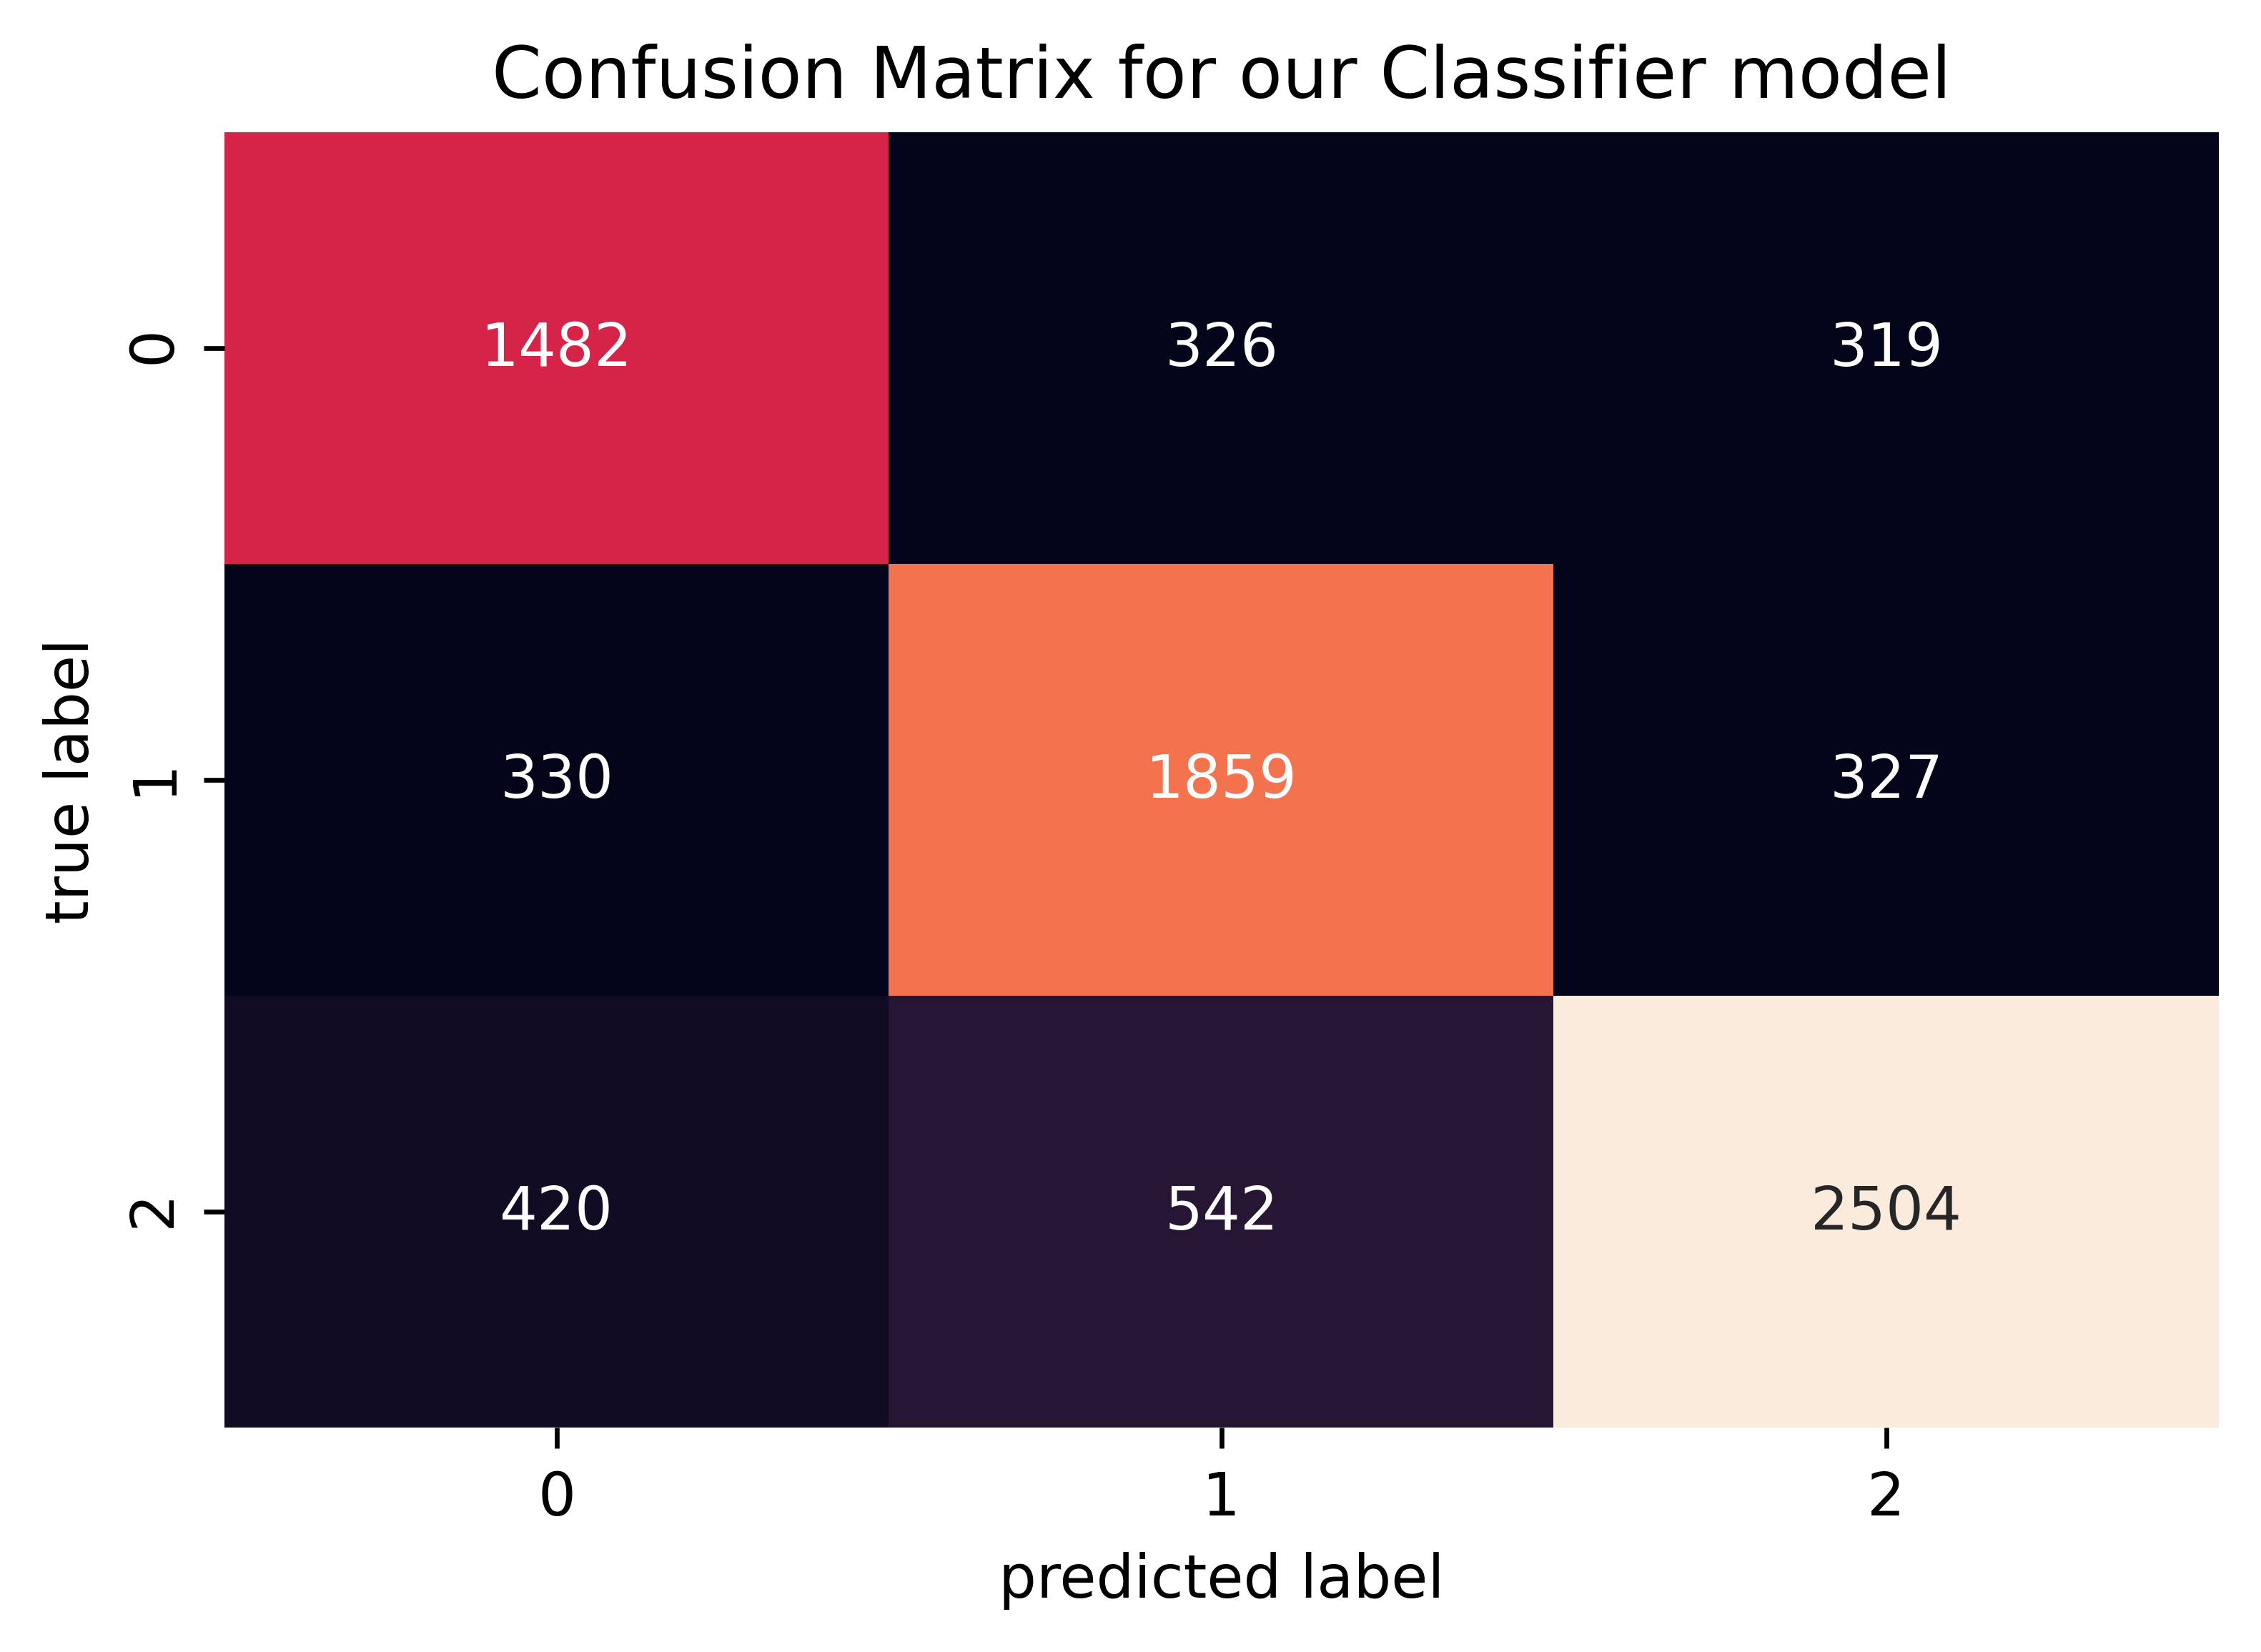

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for our Classifier model')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.savefig("C:\\Users\\user\\Twitter analysis Project\\data\\confusion_matrix.png")
plt.show()

In [10]:
print(metrics.classification_report(y_test,predicted_naive))

              precision    recall  f1-score   support

    Negative       0.70      0.66      0.68      2232
     Neutral       0.74      0.68      0.71      2727
    Positive       0.72      0.79      0.76      3150

    accuracy                           0.72      8109
   macro avg       0.72      0.71      0.72      8109
weighted avg       0.72      0.72      0.72      8109



In [11]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score( y_test,predicted_naive)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.7208040448883956


In [12]:
# Print a classification report
print(metrics.classification_report(y_test,predicted_naive))

              precision    recall  f1-score   support

    Negative       0.70      0.66      0.68      2232
     Neutral       0.74      0.68      0.71      2727
    Positive       0.72      0.79      0.76      3150

    accuracy                           0.72      8109
   macro avg       0.72      0.71      0.72      8109
weighted avg       0.72      0.72      0.72      8109

